In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv('datasets/LoanApprovalPrediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
df1=df.drop(['Loan_ID'],axis='columns')
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
df1.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

VISUALIZATION

In [32]:
obj=(df1.dtypes==object)
obj_col=obj[obj].index
obj_col

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

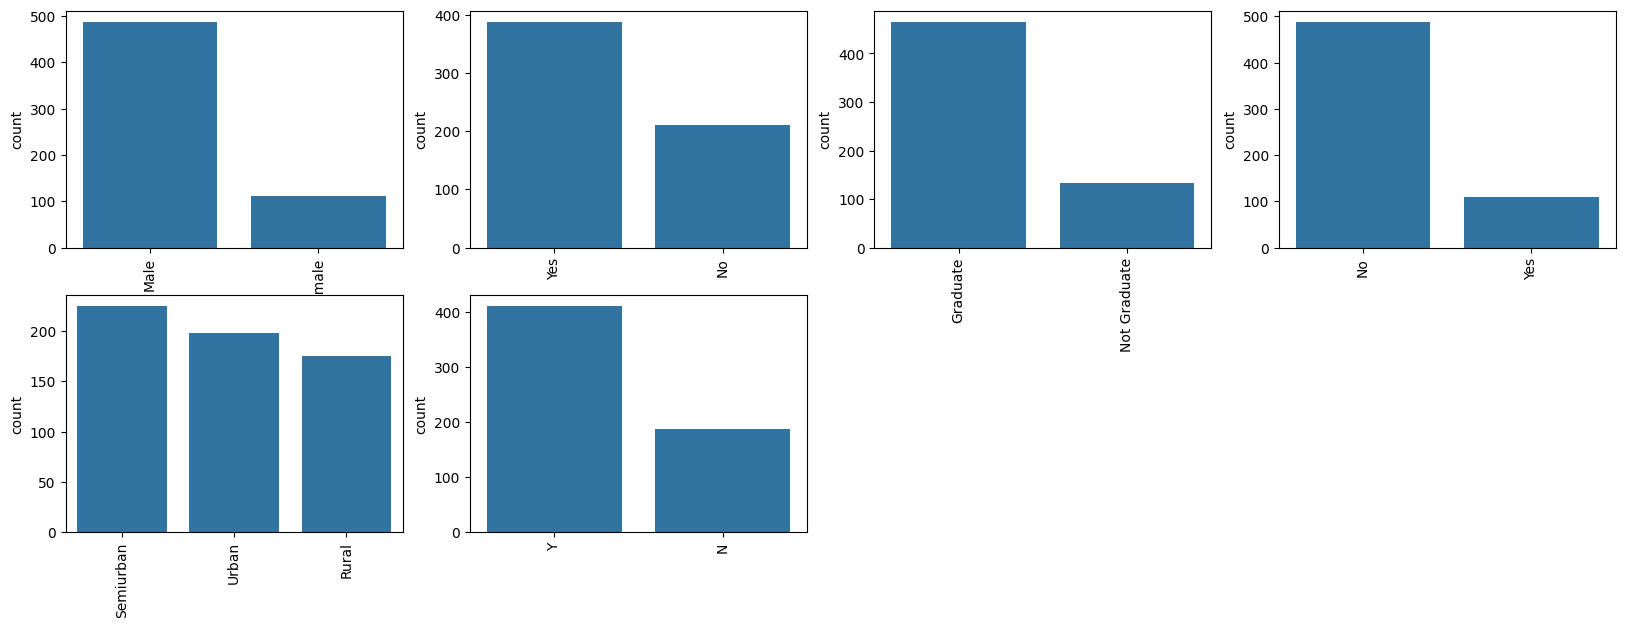

In [33]:
plt.figure(figsize=(20,40)) 
index = 1
  
for col in obj_col: 
  y = df[col].value_counts() 
  plt.subplot(11,4,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y) 
  index +=1

Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [35]:
[[x,df1[x].unique()] for x in obj_col]

[['Gender', array(['Male', 'Female'], dtype=object)],
 ['Married', array(['No', 'Yes'], dtype=object)],
 ['Education', array(['Graduate', 'Not Graduate'], dtype=object)],
 ['Self_Employed', array(['No', 'Yes'], dtype=object)],
 ['Property_Area', array(['Urban', 'Rural', 'Semiurban'], dtype=object)],
 ['Loan_Status', array(['Y', 'N'], dtype=object)]]

In [36]:
pd.DataFrame(label_encoder.fit_transform(df1['Education']),columns=['Education']).head()

,Education
0,0
1,0
2,0
3,1
4,0


In [45]:
df1['Credit_History'].value_counts()

Credit_History
1.0    463
0.0     86
Name: count, dtype: int64

In [38]:
df2=df1.copy()
for col in obj_col:
    df2[col]=label_encoder.fit_transform(df2[col])
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [39]:
df2.dtypes=='object'

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

Visualization And FillNA

<Axes: >

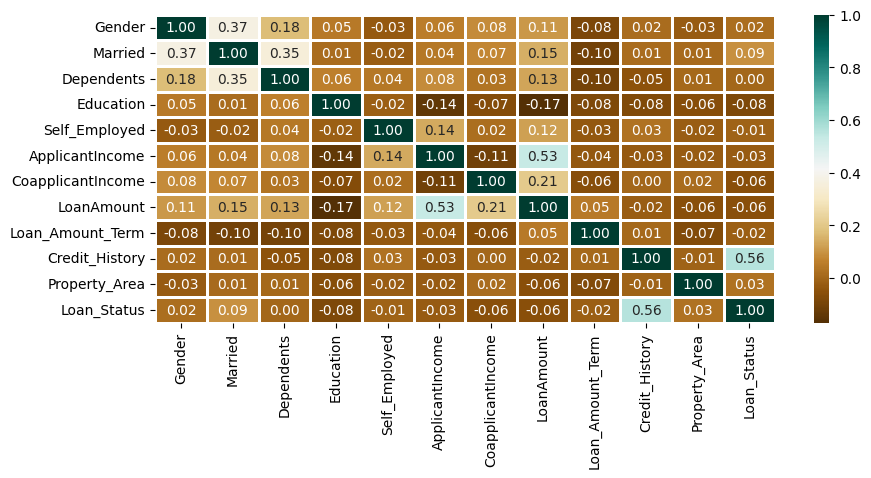

In [40]:

plt.figure(figsize=(10,4))   
sns.heatmap(df2.corr(),cmap='BrBG',fmt='.2f', 
            linewidths=2,annot=True)

In [41]:
df2.isna().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
df2['Dependents']=df2['Dependents'].fillna(0)
df2['LoanAmount']=df2['LoanAmount'].fillna(df['LoanAmount'].mean())
df2['Loan_Amount_Term']=df2['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df2['Credit_History']=df2['Credit_History'].fillna(0)

In [43]:
df2.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Save the Preprocessed CSV

In [44]:
df2.to_csv('datasets/LoanApprovalProcessed.csv',index=False)